In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [282]:
df = pd.read_csv('student-por.csv',delimiter=";")

In [283]:
df.iloc[0]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            4
G1                  0
G2                 11
G3                 11
Name: 0, dtype: object

In [284]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

In [285]:
df['G'] = df.apply(lambda row: (row["G1"] + row["G2"] + row["G3"])/3, axis=1)
df['G'] = df['G'].astype('int64')


In [286]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
G              int64
dtype: object

In [287]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,10
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10


In [288]:
df_amended = df

for i in df_amended.columns:
    if df_amended.dtypes[i] == 'object':
        new_value = 0
        for i2 in df_amended[i].unique():            
            df_amended[i] = df_amended[i].replace({i2:new_value})
            new_value += 1
    else:
        pass

/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_81300/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_81300/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/var/folders/j6/4jq4sj8s6yb1qwrn76x2g6q00000gp/T/ipykernel_81300/3954079348.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

In [289]:
df_amended.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
G             int64
dtype: object

In [290]:
X = df_amended.drop(['G1', 'G2', 'G3', 'G'], axis=1)
y = df_amended['G']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [292]:
X_train.shape

(434, 30)

In [293]:
models = []
for iattempt in range(100):
    model = DecisionTreeClassifier(
        splitter="random",
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    models.append((model, score))

best_model = max(models, key=lambda duplets: duplets[1])

for imodel in range(len(models)):
    print(models[imodel])
print("The best is: ", best_model)

(DecisionTreeClassifier(splitter='random'), 0.13953488372093023)
(DecisionTreeClassifier(splitter='random'), 0.13953488372093023)
(DecisionTreeClassifier(splitter='random'), 0.14883720930232558)
(DecisionTreeClassifier(splitter='random'), 0.15348837209302327)
(DecisionTreeClassifier(splitter='random'), 0.17209302325581396)
(DecisionTreeClassifier(splitter='random'), 0.12093023255813953)
(DecisionTreeClassifier(splitter='random'), 0.13953488372093023)
(DecisionTreeClassifier(splitter='random'), 0.14418604651162792)
(DecisionTreeClassifier(splitter='random'), 0.13488372093023257)
(DecisionTreeClassifier(splitter='random'), 0.14418604651162792)
(DecisionTreeClassifier(splitter='random'), 0.13023255813953488)
(DecisionTreeClassifier(splitter='random'), 0.14418604651162792)
(DecisionTreeClassifier(splitter='random'), 0.13953488372093023)
(DecisionTreeClassifier(splitter='random'), 0.17674418604651163)
(DecisionTreeClassifier(splitter='random'), 0.15813953488372093)
(DecisionTreeClassifier(s

In [305]:
model = DecisionTreeClassifier(
    splitter="best",
    criterion="gini", 
    max_depth = 4, 
    max_leaf_nodes = None, 
    min_samples_split=10, 
    min_samples_leaf=1, 
    min_impurity_decrease=0.00, 
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.20930232558139536

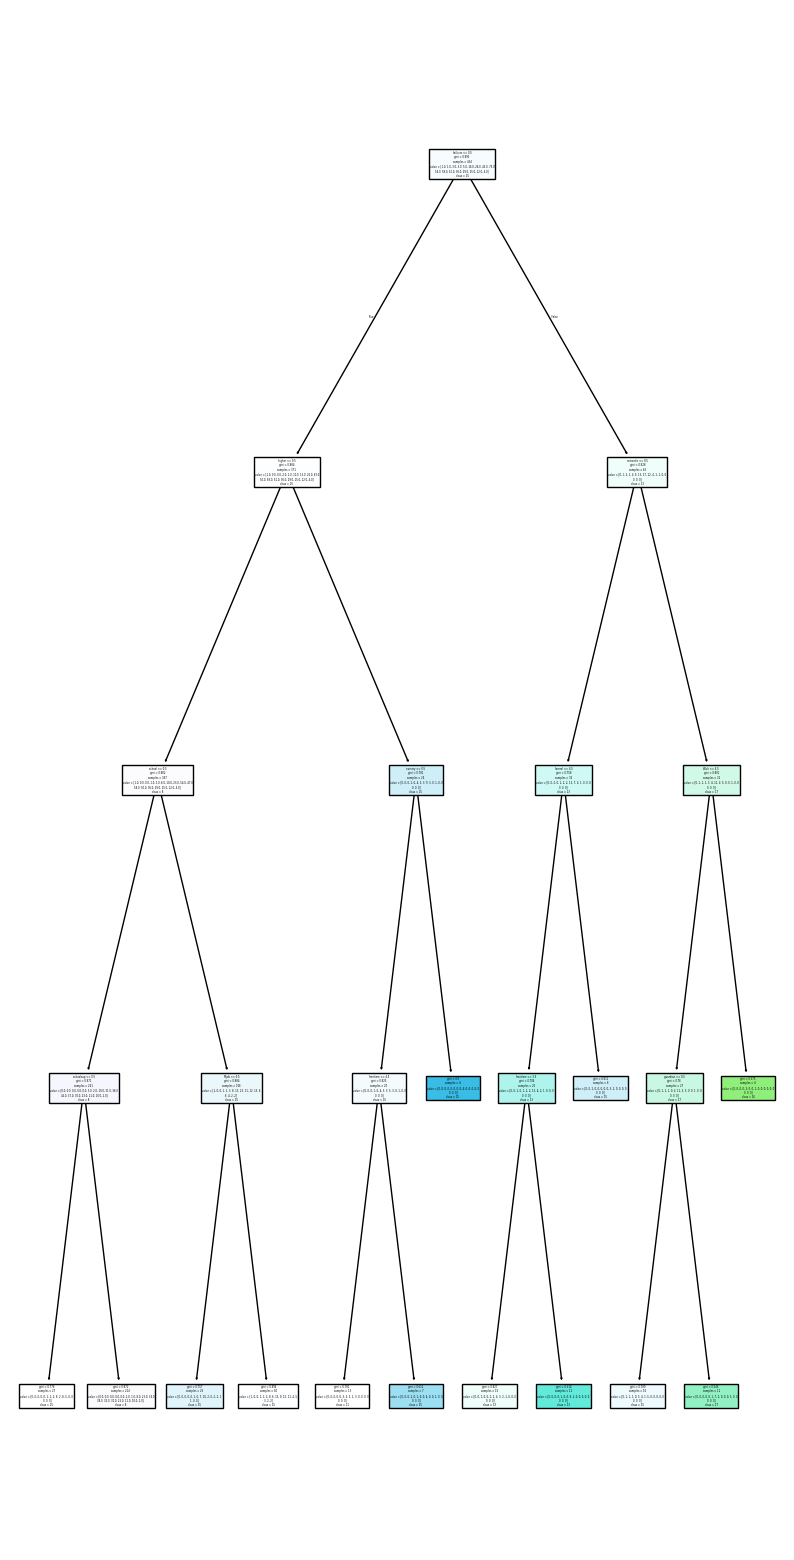

In [306]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 20))
_ = tree.plot_tree(model,
                   feature_names = X.columns.tolist(),
                   class_names = [str(cls) for cls in y.unique()],
                   filled = True
                   )

In [298]:
!pip install graphviz
!pip install dtreeviz

53422.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


53428.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [307]:
from sklearn import tree
import graphviz

df_visual = df_amended.drop(['G'], axis=1)
df_visual_y = df_amended['G']

learned_tree = tree.export_graphviz(
    model,
    feature_names=X.columns.tolist(),
    class_names=[str(cls) for cls in y.unique()],
    filled=True,
    rounded=True,
)

graph = graphviz.Source(learned_tree, format="png")
graph.render("school_path")

'school_path.png'

In [303]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=10000,
    bootstrap=True,
    n_jobs=1,
    criterion="gini",
    max_depth = 8,
    min_samples_split=16,
    min_samples_leaf=1,
    max_leaf_nodes=16,
    min_impurity_decrease=0.0
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22325581395348837